# Master M2 MVA 2018/2019 - Graphical models - HWK 3

## Louis GUO, Laurent LIN

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

%matplotlib inline

np.random.seed(1)

import tools.Dataset as dt
from models.HMM import *

data = dt.Dataset()

Define initial parameters parameters.

In [2]:
K = 4

A = np.full((4, 4), 1/4)
pi = np.array([1/4] * 4)

cluster_cov = np.array([
    [[ 6.24574401,  6.05423058],
    [ 6.05423058,  6.18624224]],

    [[ 0.91785194,  0.05668676],
    [ 0.05668676,  1.88233748]],

    [[ 0.20962311,  0.28501224],
    [ 0.28501224, 12.13184803]],

    [[ 2.90498461,  0.20707883],
    [ 0.20707883, 2.75639595]]
])

cluster_centers = np.array([
    [-3.06110456, -3.53373378], 
    [ 3.80023472, -3.78938547],
    [ 3.97913857, 3.7972538],
    [-2.03424264, 4.17271066]
])

# EM testing

0
1
2
3
4
5
6


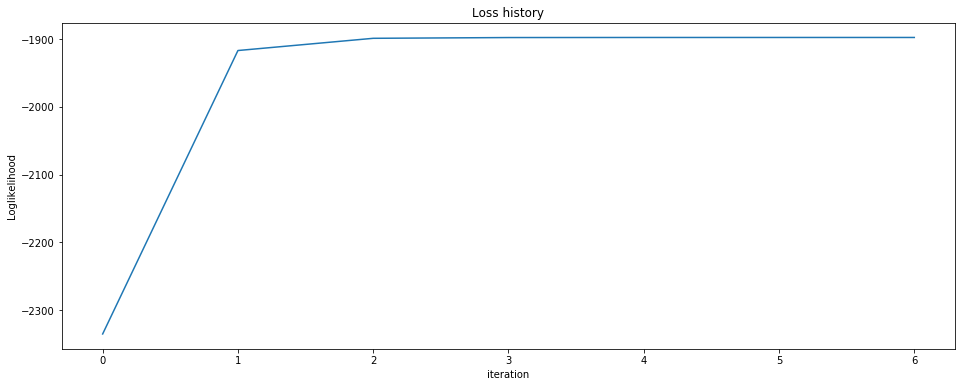

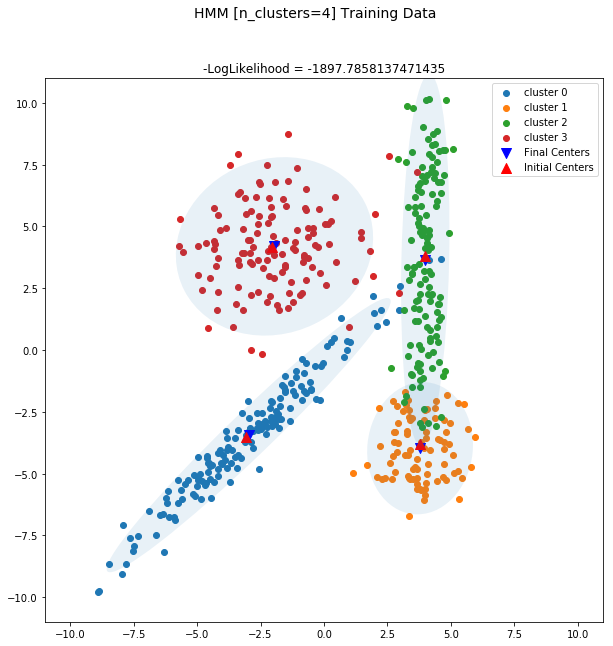

Train loglikelihood = -1897.7858137471435, Train loglikelihood per point = -3.795571627494287


In [3]:
model = HiddenMarkovModel(
    pi=pi, cluster_centers=cluster_centers, cluster_cov=cluster_cov, A=A, max_iter=100, tol=1e-2
)
y = data.X_train
model.fit(X=y)

plt.figure(figsize=(16, 6))
plt.plot(model.loss_history_)
plt.title("Loss history")
plt.xlabel("iteration")
plt.ylabel("Loglikelihood")
plt.show()

model.plot_clusters()

train_loss = model.loss_history_[model.n_iter_ - 1]
print(f"Train loglikelihood = {train_loss}, Train loglikelihood per point = {train_loss / len(model.X_)}")

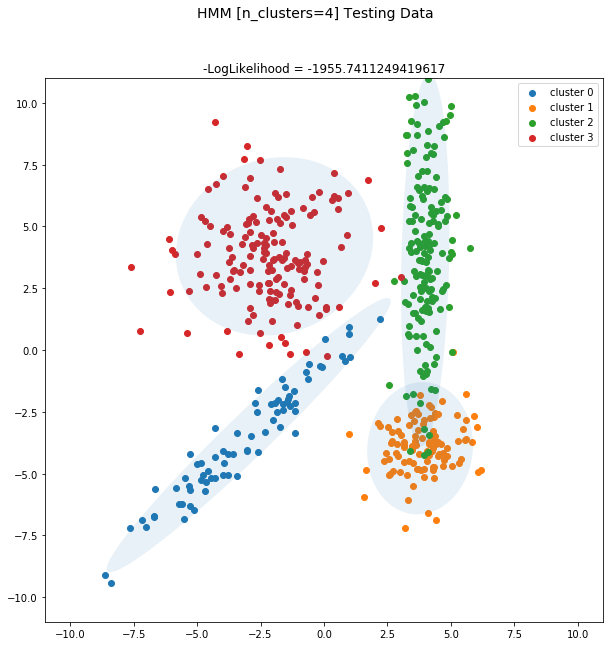

Test loglikelihood = -1955.7411249419617, Test loglikelihood per point = -3.9114822498839237


In [4]:
model.test_results(data.X_test)